In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#read in dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_data.Survived=None

In [3]:
#feature engineering on name
titles=['Mr'
,'Mrs'
,'Miss'
,'Master'
,'Don'
,'Rev'
,'Dr'
,'Mme'
,'Ms'
,'Major'
,'Lady'
,'Sir'
,'Mile'
,'Col'
,'Capt'
,'Countess'
,'Jonkheer']
train_data['Name_feat']=0
test_data['Name_feat']=0
train_data['title']=0
test_data['title']=0
for i,title in enumerate(titles):
    for j,name in enumerate(train_data.Name):
        if title in name:
            train_data['Name_feat'].iloc[j]=i
            train_data['title'].iloc[j]=titles[i]
    for j,name in enumerate(test_data.Name):
        if title in name:
            test_data['Name_feat'].iloc[j]=i
            train_data['title'].iloc[j]=titles[i]

C:\Users\86180\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


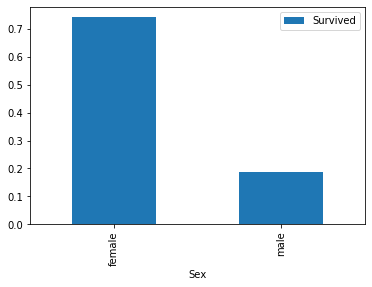

In [4]:
#exploratory data analysis
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

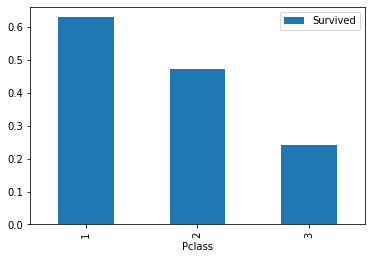

In [5]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

Text(0, 0.5, 'Survival rate')

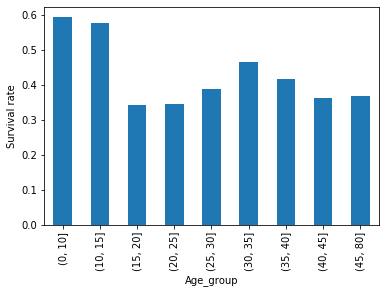

In [6]:
bins = [0,10,15,20,25,30,35,40,45,80]
train_data['Age_group'] = pd.cut(train_data['Age'], bins)
by_age = train_data.groupby('Age_group')['Survived'].mean()
by_age
by_age.plot(kind = 'bar')
plt.ylabel("Survival rate")

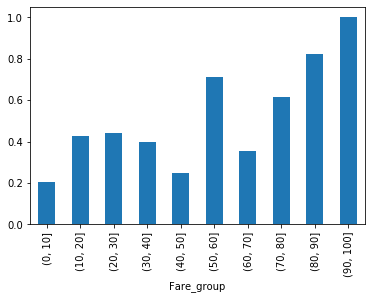

In [7]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
train_data['Fare_group'] = pd.cut(train_data['Fare'], bins)
by_Fare = train_data.groupby('Fare_group')['Survived'].mean()
by_Fare.plot(kind = 'bar')

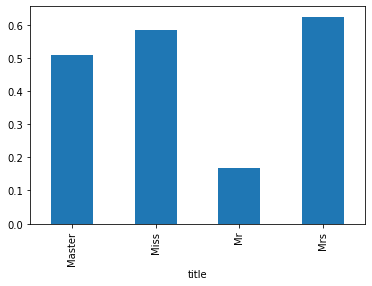

In [8]:
train_data[(train_data['title']=='Mr')|(train_data['title']=='Mrs')|(train_data['title']=='Miss')|(train_data['title']=='Master')].groupby('title')['Survived'].mean().plot.bar()

In [9]:
concat_data=pd.concat([train_data,test_data])
#fill in missing data of Embarked
train_data.Embarked[train_data.Embarked.isnull()] = concat_data.Embarked.dropna().mode().values
test_data.Embarked[test_data.Embarked.isnull()]= concat_data.Embarked.dropna().mode().values
#fill in missing data of carbin
train_data.Cabin[train_data['Cabin'].notnull()]=1
train_data.Cabin[train_data['Cabin'].isnull()]=0
test_data.Cabin[train_data['Cabin'].notnull()]=1
test_data.Cabin[train_data['Cabin'].isnull()]=0
#fill in missing data of fare
test_data.Fare.fillna(concat_data.Fare.mean(),inplace=True)
concat_data=pd.concat([train_data,test_data])

C:\Users\86180\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
C:\Users\86180\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\86180\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [10]:
process_concat=pd.get_dummies(concat_data,columns=['Pclass','Sex','Embarked','Name_feat'])
process_train=process_concat[process_concat['Survived'].notnull()]
process_test=process_concat[process_concat['Survived'].isnull()]

In [11]:
#split all data into trainingset with age isn't NaN and test set with age is NaN
concat_age_df = process_concat[[ 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S','Name_feat_0', 'Name_feat_1', 'Name_feat_10', 'Name_feat_11',
       'Name_feat_12', 'Name_feat_13', 'Name_feat_14', 'Name_feat_15',
       'Name_feat_16', 'Name_feat_2', 'Name_feat_3', 'Name_feat_4',
       'Name_feat_5', 'Name_feat_6', 'Name_feat_7', 'Name_feat_8',
       'Name_feat_9']]
concat_age_df_notnull = concat_age_df[(concat_data['Age'].notnull())]
concat_age_df_isnull = concat_age_df[(concat_data['Age'].isnull())]

train_age_df = process_train[[ 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S','Name_feat_0', 'Name_feat_1', 'Name_feat_10', 'Name_feat_11',
       'Name_feat_12', 'Name_feat_13', 'Name_feat_14', 'Name_feat_15',
       'Name_feat_16', 'Name_feat_2', 'Name_feat_3', 'Name_feat_4',
       'Name_feat_5', 'Name_feat_6', 'Name_feat_7', 'Name_feat_8',
       'Name_feat_9']]
train_age_df_notnull = train_age_df[(train_data['Age'].notnull())]
train_age_df_isnull = train_age_df[(train_data['Age'].isnull())]

test_age_df = process_test[[ 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S','Name_feat_0', 'Name_feat_1', 'Name_feat_10', 'Name_feat_11',
       'Name_feat_12', 'Name_feat_13', 'Name_feat_14', 'Name_feat_15',
       'Name_feat_16', 'Name_feat_2', 'Name_feat_3', 'Name_feat_4',
       'Name_feat_5', 'Name_feat_6', 'Name_feat_7', 'Name_feat_8',
       'Name_feat_9']]
test_age_df_notnull = test_age_df[(test_data['Age'].notnull())]
test_age_df_isnull = test_age_df[(test_data['Age'].isnull())]
X = concat_age_df_notnull.values[:,1:]
Y = concat_age_df_notnull.values[:,0]
#do cross validation to choose train a best gradientboost regressor to fill missing age 
parameters = {'loss':['ls','huber'],'learning_rate':[0.01,0.05,0.1],'max_depth':[4,5,6,7,8]}
gbm=GradientBoostingRegressor(n_iter_no_change=1,n_estimators=5000,tol=1e-5,subsample=0.5)
reg = GridSearchCV(gbm, parameters)
reg.fit(X,Y)
pd.DataFrame(reg.cv_results_)

C:\Users\86180\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.088302,0.010973,0.001347,0.000461,0.01,ls,4,"{'learning_rate': 0.01, 'loss': 'ls', 'max_dep...",0.379565,0.367611,0.386429,0.377860,0.007774,21
1,0.106359,0.017230,0.001975,0.000036,0.01,ls,5,"{'learning_rate': 0.01, 'loss': 'ls', 'max_dep...",0.349680,0.419627,0.421937,0.397057,0.033538,5
2,0.100669,0.028926,0.002038,0.000865,0.01,ls,6,"{'learning_rate': 0.01, 'loss': 'ls', 'max_dep...",0.373168,0.329349,0.362886,0.355127,0.018717,26
3,0.114002,0.026229,0.002002,0.000834,0.01,ls,7,"{'learning_rate': 0.01, 'loss': 'ls', 'max_dep...",0.348951,0.402181,0.301521,0.350932,0.041109,28
4,0.126664,0.009970,0.002345,0.000477,0.01,ls,8,"{'learning_rate': 0.01, 'loss': 'ls', 'max_dep...",0.332319,0.390848,0.386693,0.369937,0.026674,25
5,0.244318,0.019601,0.001001,0.000009,0.01,huber,4,"{'learning_rate': 0.01, 'loss': 'huber', 'max_...",0.382499,0.376513,0.370364,0.376464,0.004953,23
6,0.250698,0.008235,0.000996,0.000016,0.01,huber,5,"{'learning_rate': 0.01, 'loss': 'huber', 'max_...",0.316597,0.357345,0.379575,0.351145,0.026076,27
7,0.487701,0.049900,0.001992,0.000008,0.01,huber,6,"{'learning_rate': 0.01, 'loss': 'huber', 'max_...",0.367458,0.414547,0.401714,0.394566,0.019884,8
8,0.463027,0.066725,0.001672,0.000478,0.01,huber,7,"{'learning_rate': 0.01, 'loss': 'huber', 'max_...",0.296620,0.336781,0.365406,0.332904,0.028208,30
9,0.731024,0.154916,0.002987,0.000812,0.01,huber,8,"{'learning_rate': 0.01, 'loss': 'huber', 'max_...",0.366226,0.321785,0.353054,0.347016,0.018645,29


In [12]:
#use the predict result above to fill in missing age value in both train set and test set 
train_predictAges = reg.predict(train_age_df_isnull.values[:,1:])
process_train.Age[train_data['Age'].isnull()]= train_predictAges
test_predictAges = reg.predict(test_age_df_isnull.values[:,1:])
process_test.Age[test_data['Age'].isnull()]= test_predictAges

C:\Users\86180\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\86180\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\86180\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [13]:
#train our ultimate gradient boost classifier with cross-validation 
Xtrain=process_train[[ 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S','Name_feat_0', 'Name_feat_1', 'Name_feat_10', 'Name_feat_11',
       'Name_feat_12', 'Name_feat_13', 'Name_feat_14', 'Name_feat_15',
       'Name_feat_16', 'Name_feat_2', 'Name_feat_3', 'Name_feat_4',
       'Name_feat_5', 'Name_feat_6', 'Name_feat_7', 'Name_feat_8',
       'Name_feat_9']]
ytrain=process_train['Survived']
#do not need to tune 'min_sample_split' because the dataset is small 
parameters = { 'learning_rate':[0.001,0.01,0.1],'max_depth':[4,5,6,7,8]}
gbm=GradientBoostingClassifier(n_iter_no_change=1,n_estimators=3000,tol=1e-5,subsample=0.5,loss='deviance')
clf = GridSearchCV(gbm, parameters)
clf.fit(Xtrain, ytrain)
pd.DataFrame(clf.cv_results_)

C:\Users\86180\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.101972,0.219300,0.009329,0.002058,0.001,4,"{'learning_rate': 0.001, 'max_depth': 4}",0.794613,0.841751,0.824916,0.820426,0.019504,8
1,1.167347,0.248892,0.010029,0.001430,0.001,5,"{'learning_rate': 0.001, 'max_depth': 5}",0.777778,0.838384,0.821549,0.812570,0.025544,11
2,1.542695,0.120013,0.013653,0.002367,0.001,6,"{'learning_rate': 0.001, 'max_depth': 6}",0.804714,0.855219,0.831650,0.830527,0.020634,2
3,1.407001,0.612665,0.011991,0.005665,0.001,7,"{'learning_rate': 0.001, 'max_depth': 7}",0.808081,0.801347,0.821549,0.810325,0.008399,13
4,1.152351,0.692162,0.009351,0.005279,0.001,8,"{'learning_rate': 0.001, 'max_depth': 8}",0.804714,0.828283,0.616162,0.749719,0.094929,15
5,0.113679,0.030730,0.001991,0.000013,0.01,4,"{'learning_rate': 0.01, 'max_depth': 4}",0.811448,0.845118,0.831650,0.829405,0.013837,5
6,0.124000,0.020618,0.001999,0.000012,0.01,5,"{'learning_rate': 0.01, 'max_depth': 5}",0.811448,0.841751,0.838384,0.830527,0.013561,2
7,0.148030,0.042918,0.002299,0.000430,0.01,6,"{'learning_rate': 0.01, 'max_depth': 6}",0.808081,0.838384,0.845118,0.830527,0.016109,2
8,0.215990,0.081316,0.002338,0.000477,0.01,7,"{'learning_rate': 0.01, 'max_depth': 7}",0.804714,0.818182,0.811448,0.811448,0.005498,12
9,0.316994,0.151627,0.003030,0.000843,0.01,8,"{'learning_rate': 0.01, 'max_depth': 8}",0.808081,0.845118,0.824916,0.826038,0.015141,6


In [14]:
clf.best_score_

0.8316498316498316

In [15]:
clf.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3000,
                           n_iter_no_change=1, presort='auto',
                           random_state=None, subsample=0.5, tol=1e-05,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Text(0.3, 0.45, 'AUC=0.9161')

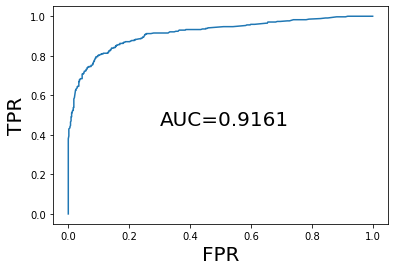

In [16]:
#plot ROC curve
from sklearn import metrics
yscore=clf.best_estimator_.predict_proba(Xtrain)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true=ytrain,y_score=yscore, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('FPR',fontsize=20)
plt.ylabel('TPR',fontsize=20)
plt.text(0.3,0.45,'AUC='+str(round(metrics.roc_auc_score(y_true=ytrain,y_score=yscore),4)),fontsize=20)

In [17]:
#draw a confusion matrix
confusion_matrix=metrics.confusion_matrix(ytrain,clf.best_estimator_.predict(Xtrain))
pd.DataFrame(confusion_matrix,index=['True death','True survied'],columns=['Predict death','Predict survived'])

,Predict death,Predict survived
True death,524,25
True survied,100,242


In [18]:
features=[ 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S','Name_feat_0', 'Name_feat_1', 'Name_feat_10', 'Name_feat_11',
       'Name_feat_12', 'Name_feat_13', 'Name_feat_14', 'Name_feat_15',
       'Name_feat_16', 'Name_feat_2', 'Name_feat_3', 'Name_feat_4',
       'Name_feat_5', 'Name_feat_6', 'Name_feat_7', 'Name_feat_8',
       'Name_feat_9']

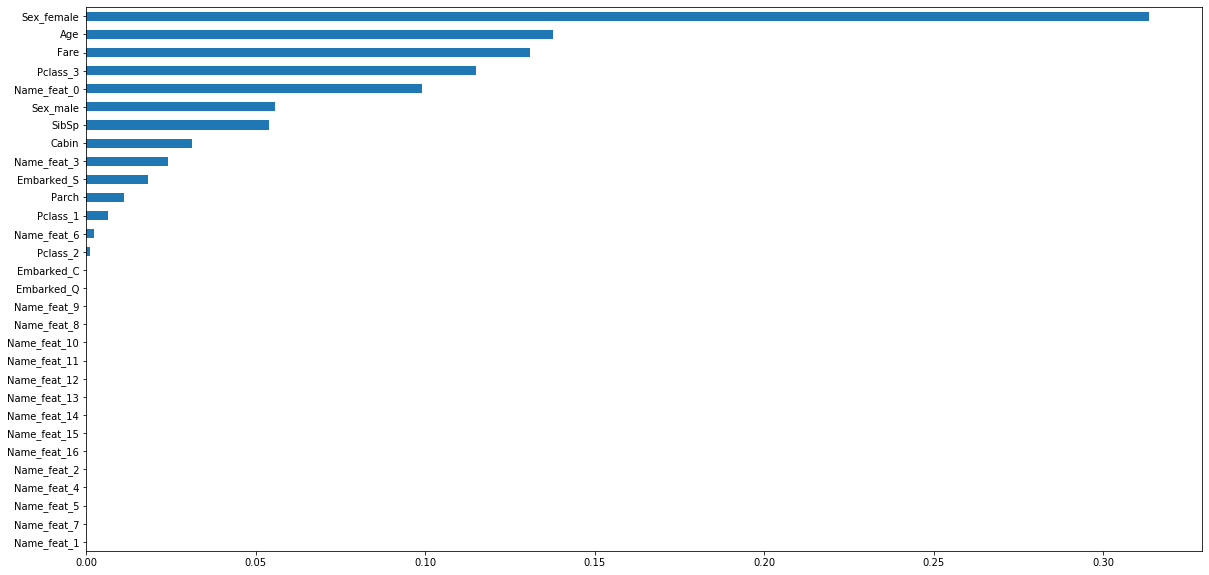

In [19]:
#Relative Importance of Predictor Variables 
fig=plt.figure(figsize=(20,10))
pd.Series(clf.best_estimator_.feature_importances_, index=features).sort_values().plot(kind="barh")

C:\Users\86180\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\86180\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\86180\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=Deprec

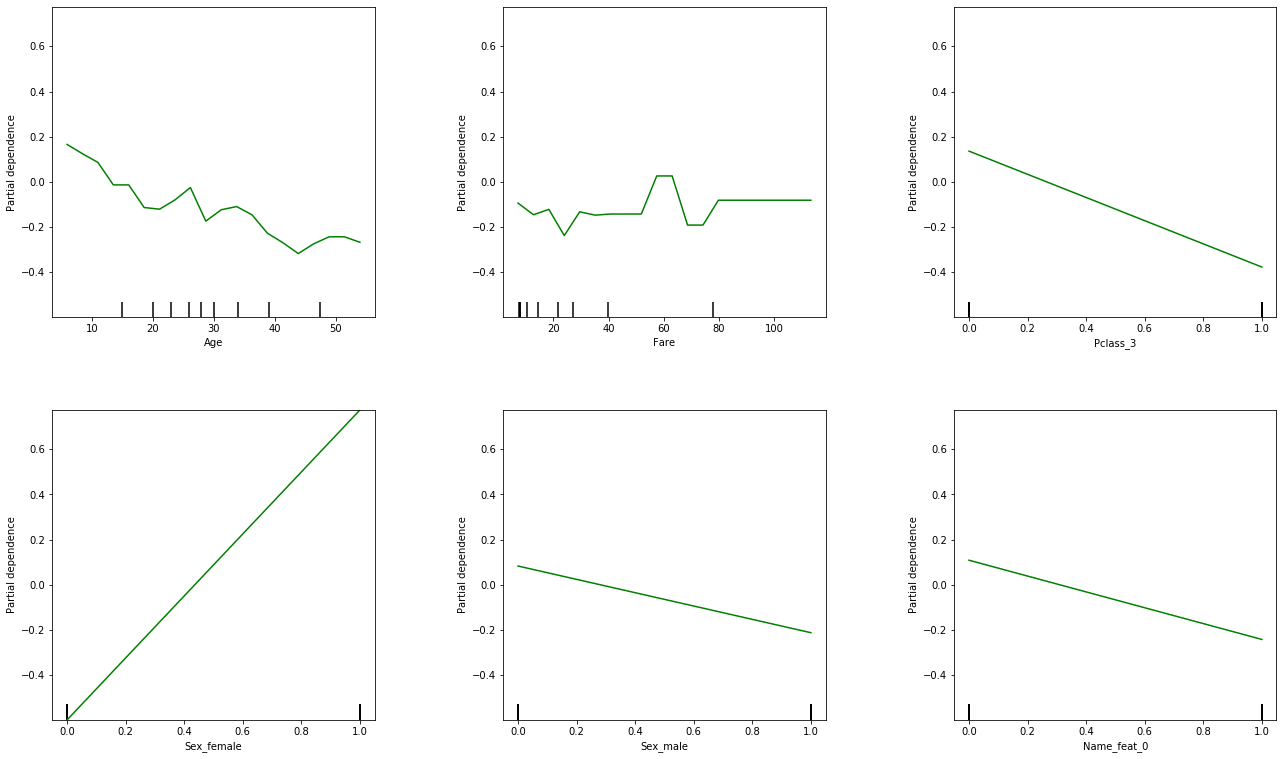

In [20]:
#Partial Dependence Plots
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
fig=plt.figure(figsize=(20,18))
ax=fig.add_subplot(2,3,1)
titanic_plots = plot_partial_dependence(clf.best_estimator_, features=[0,3,7,8,9,13], X=Xtrain, 
                      ax=ax,feature_names=[ 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S','Name_feat_0', 'Name_feat_1', 'Name_feat_10', 'Name_feat_11',
       'Name_feat_12', 'Name_feat_13', 'Name_feat_14', 'Name_feat_15',
       'Name_feat_16', 'Name_feat_2', 'Name_feat_3', 'Name_feat_4',
       'Name_feat_5', 'Name_feat_6', 'Name_feat_7', 'Name_feat_8',
       'Name_feat_9'], grid_resolution=20)

In [21]:
from sklearn.tree import DecisionTreeRegressor
from scipy.misc import derivative
import math
from sklearn.metrics import accuracy_score
#use deviance loss
def loss(fx,y):
    return math.log(1+math.exp(-2*fx*y))
def loss_derivative(fx,y):
    return (-2*y*math.exp(-2*fx*y))/(1+math.exp(-2*fx*y))
#implement stochastic gradient boost tree classifier using deviance as loss function and use early stopping
class gradientboostclassifier:
    def __init__(self,learning_rate=0.01,n_estimators=800,max_depth=6,sub_sample=0.5):
        self.learning_rate=learning_rate
        self.estimator_list=[]
        self.n_estimators=n_estimators
        self.max_depth=max_depth
        self.sub_sample=sub_sample
    def fit(self,X,y):
        self.finalclf=[]
        n=X.shape[0]
        #train and validation split
        n_train=math.ceil(n*0.9)
        n_vali=n-n_train
        n_sample=math.ceil(self.sub_sample*n_train)
        index_train=np.random.choice(a=n, size=n_train, replace=False, p=None)
        index_vali=np.delete(np.arange(n),index_train)
        X_train=X.iloc[index_train]
        X_vali=X.iloc[index_vali]
        y_train=y[index_train]
        y_vali=y[index_vali]
        train_predict=np.zeros((n_train))
        vali_predict=np.zeros((n_vali))
        vali_loss_sum=0
        #begin stochastic gradient boost tree
        for i in range(self.n_estimators):
            current_gradient=np.array([])
            new_vali_loss_sum=0
            #randomly choose some sample to fit the tree
            sample=np.random.choice(a=n_train, size=n_sample, replace=False, p=None)
            for j in sample:
                current_gradient=np.append(current_gradient,-loss_derivative(train_predict[j],y_train[j]))
            reg=DecisionTreeRegressor(max_depth=self.max_depth)
            reg.fit(X_train.iloc[sample],current_gradient)
            self.finalclf.append(reg)
            train_predict=train_predict+self.learning_rate*reg.predict(X_train)
            vali_predict=vali_predict+self.learning_rate*reg.predict(X_vali)
            #calculate loss on validation set,if not improve,do early stopping
            for k in range(n_vali):
                new_vali_loss_sum=new_vali_loss_sum+loss(vali_predict[k],y_vali[k])
            if (i>1) and ((new_vali_loss_sum-vali_loss_sum)>0):
                break;
            else:
                vali_loss_sum=new_vali_loss_sum
    def predict(self,X):
        predict=np.zeros((X.shape[0]))
        for i in range(len(self.finalclf)):
            predict=predict+self.learning_rate*self.finalclf[i].predict(X)
        predict=np.array([1 if i>0 else 0 for i in predict])
        return predict

In [22]:
#our implemented classifier
ytrain_process=np.array([1 if y==1 else -1 for y in ytrain])
a=gradientboostclassifier()
a.fit(Xtrain, ytrain_process)
accuracy_score(ytrain,a.predict(Xtrain))

0.9001122334455668

In [23]:
#use the model train by sklearn(not our implemented algorithm above to predict test set survived value)
#our implemented algorithm above is less accurate(just a little bit) because we do not tune hyperperametre but use empirically good hyperperametre
Xtest=process_test[[ 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S','Name_feat_0', 'Name_feat_1', 'Name_feat_10', 'Name_feat_11',
       'Name_feat_12', 'Name_feat_13', 'Name_feat_14', 'Name_feat_15',
       'Name_feat_16', 'Name_feat_2', 'Name_feat_3', 'Name_feat_4',
       'Name_feat_5', 'Name_feat_6', 'Name_feat_7', 'Name_feat_8',
       'Name_feat_9']]
#if you want to use our implemented gradientboost to predict, just use ytest=a.predict(Xtest),but accuracy will be little bit lower at about0.02
#ytest=a.predict(Xtest)
ytest=clf.predict(Xtest)

In [24]:
#submsission on Kaggle  
Submission = pd.DataFrame({'PassengerId': process_test.PassengerId, 'Survived': ytest})
Submission['Survived']=Submission['Survived'].astype('int')
Submission.to_csv('Submission.csv',index=False,sep=',')